<a href="https://colab.research.google.com/github/eggtartplus/nlp/blob/main/%5BHuoting_He%5D_%5B222041043%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 (CSC3160/MDS6002)

This is an instruction and template for the first assignment. In this assignment, you will utilize various tools to extract spectrogram features, perform speech recognition, generate speech, and align speech. Additionally, you will summarize the provided research paper. 

Should you have any inquiries, please feel free to ask in the GitHub discussion forum found at: https://github.com/orgs/SLPcourse/discussions/categories/assignments.

Please follow the template to finish your assignment and submit in GitHub.

## Example: Extracting spectrogram

In [ ]:
!pip install torch>=1.2.0     #install torch
!pip install torchaudio       #install torchaudio
#sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

!pip install librosa          #install librosa
!pip install ffmpeg
!pip install git+https://github.com/openai/whisper.git
!pip install jiwer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-pk9mha_w
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-pk9mha_w
  Resolved https://github.com/openai/whisper.git to commit 7858aa9c08d98f75575035ecd6481f462d66ca27
  Preparing metadata (setup.py) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Shape of waveform: torch.Size([1, 139421])
Sample rate of waveform: 22050
Shape of resampled_waveform: torch.Size([1, 101168])


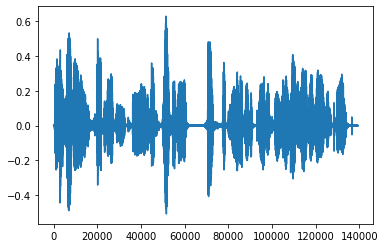

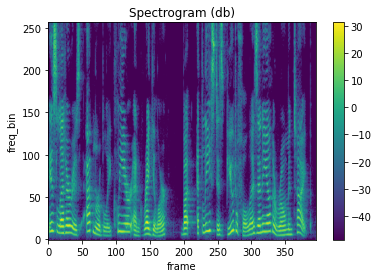

In [ ]:
import requests
import torchaudio
import matplotlib.pyplot as plt
import torchaudio.functional as F
import torchaudio.transforms as T
import librosa

target_sample_rate = 16000
n_fft = 512

# a function to plot spectrogram
def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

# url to find the audio sample
url = "https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav"
# request the url
r = requests.get(url)

# filename, where to save the audio
filename = "LJ001-0048.wav"
with open(filename, 'wb') as f:
    f.write(r.content)

# load audio sample to memory
waveform, sample_rate = torchaudio.load(filename)

# create an object that resamples a waveform
resampler = T.Resample(sample_rate, target_sample_rate, dtype=waveform.dtype)
# resample a waveform from its original sampling rate to the target sampling rate
resampled_waveform = resampler(waveform) 

# create an object that extract spectrogram
spec_trans = T.Spectrogram(n_fft=n_fft, power=2)

# extract spectrogram
spec = spec_trans(resampled_waveform)

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

print("Shape of resampled_waveform: {}".format(resampled_waveform.size()))

plt.figure()
plt.plot(waveform.t().numpy())

plot_spectrogram(spec[0])


## (1) [10 marks] Extract mel-spectrogram

In this part, you need to extract power spectorgram (FFT 1024) and 80-dimensional mel-spectrogram (80 Mel Filter Banks) with 5ms, 10ms, 15ms frameshift, with the same window size 30ms. The speech signal is at 16 kHz sampling rate.
* Visualize each of the power spectorgram (FFT 1024) and 80-dimensional mel-spectrogram
* Plot the spectrum of the 150th frame of the 512-dimensional spectrogram with 10 ms frameshift



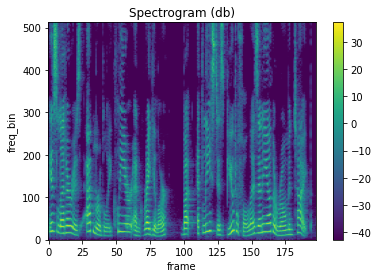

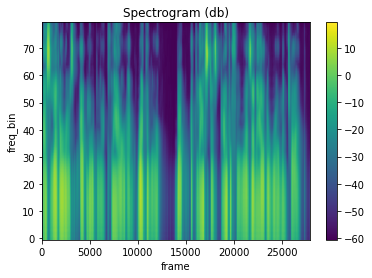

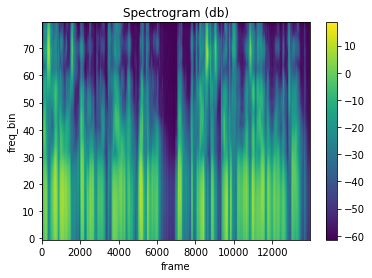

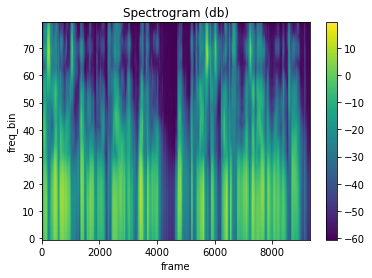

In [ ]:
# Write your implementation here
# 1.extract power spectorgram (FFT 1024)
spec_trans1024 = T.Spectrogram(n_fft=1024, power=2)
spec1024 = spec_trans1024(resampled_waveform)
plot_spectrogram(spec1024[0])

# 2.80-dimensional mel-spectrogram (80 Mel Filter Banks) with 5ms frameshift
meltransform1 = T.MelSpectrogram(target_sample_rate, n_mels=80, win_length=30, hop_length=5, n_fft=1024)
mel_specgram1 = meltransform1(waveform) 
plot_spectrogram(mel_specgram1[0])

# 3.80-dimensional mel-spectrogram (80 Mel Filter Banks) with 10ms frameshift
meltransform2 = T.MelSpectrogram(target_sample_rate, n_mels=80, win_length=30, hop_length=10, n_fft=1024)
mel_specgram2 = meltransform2(waveform) 
plot_spectrogram(mel_specgram2[0])

# 4.80-dimensional mel-spectrogram (80 Mel Filter Banks) with 15ms frameshift
meltransform3 = T.MelSpectrogram(target_sample_rate, n_mels=80, win_length=30, hop_length=15, n_fft=1024)
mel_specgram3 = meltransform3(waveform) 
plot_spectrogram(mel_specgram3[0])

# 5.the spectrum of the 150th frame of the 512-dimensional spectrogram with 10 ms frameshift


## (2) [10 marks] Record yourself

Record yourself to read the following script, which is the same as LJ001-0048.wav. Then, resample your recording to 16 kHz and 16-bit depth.

`his letter is admirably clear and regular, but at least as beautiful as any other Roman type.`

You can use your phone to record and upload to GitHub.

Shape of waveform: torch.Size([1, 443392])
Sample rate of waveform: 16000
Shape of resampled_waveform: torch.Size([1, 147798])


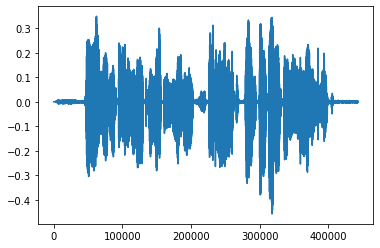

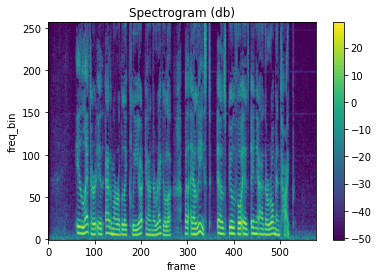

In [ ]:
# Write your implementation here
# url to find the audio sample
url = "https://raw.githubusercontent.com/eggtartplus/nlp/main/nlpass1.wav"
# request the url
r = requests.get(url)

# filename, where to save the audio
filename = "nlpass1.wav"
with open(filename, 'wb') as f:
    f.write(r.content)

# load audio sample to memory
waveform1, sample_rate1 = torchaudio.load(filename)
path = "nlpass1.wav"
torchaudio.save(path, waveform1, target_sample_rate, encoding="PCM_S", bits_per_sample=16)
waveform1, sample_rate1 = torchaudio.load(filename)

# create an object that extract spectrogram
spec_trans1 = T.Spectrogram(n_fft=n_fft, power=2)

# extract spectrogram
spec1 = spec_trans1(resampled_waveform1)

print("Shape of waveform: {}".format(waveform1.size()))
print("Sample rate of waveform: {}".format(sample_rate1))
print("Shape of resampled_waveform: {}".format(resampled_waveform1.size()))

plt.figure()
plt.plot(waveform1.t().numpy())

plot_spectrogram(spec1[0])


## (3) [10 marks] Speech recognition with Whisper model

[Whisper](https://github.com/openai/whisper) is a general-purpose speech recognition model released by OpenAI. Your task is to use the whisper model to perform speech recognition on the provided audio sample and your own recording. 

In [ ]:
# Write your implementation here
import whisper
import ffmpeg

model = whisper.load_model("base")
result = model.transcribe("nlpass1.wav")
print(result["text"])
result1 = model.transcribe("LJ001-0048.wav")
print(result1["text"])

100%|███████████████████████████████████████| 139M/139M [00:02<00:00, 50.2MiB/s]


 Later, it add more obliquely and irregular, but at least as beautiful as any other Roman type.
 His letter is admirably clear and regular, but at least as beautiful as any other Roman type.


## (4) [10 marks] Text-to-speech synthesis

Text-to-speech synthesis is to generate speech for a given text. Torchaudio has provided pretrained [Tacotron2-based model](https://pytorch.org/audio/stable/generated/torchaudio.pipelines.Tacotron2TTSBundle.html#torchaudio.pipelines.Tacotron2TTSBundle). Your task is to 
* Use the pretrained bundle to generate speech using the Character-based TTS pipeline with Tacotron2 and WaveRNN.
* Use the pretrained bundle to generate speech using the Phoneme-based TTS pipeline with Tacotron2 and WaveRNN.
* Discuss the difference between two audio samples from the above two pipelines.

The script you need to use for the text-to-speech synthesis task:

`I am <YOUR_NAME>, my student ID is <YOUR_STUDENT_ID>. I am taking the [CSC3160/MDS6002] course this semester.`


***Note: Replace `<YOUR_NAME>` and `<YOUR_STUDENT_ID>` with your real name and your student ID, respectively.***

In [ ]:
# Write your implementation here
import torchaudio
import IPython.display as ipd
text = "I am Huoting He, my student ID is 222041043. I am taking the MDS6002 course this semester."
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_CHAR_LJSPEECH

# Build processor, Tacotron2 and WaveRNN model
processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2()
vocoder = bundle.get_vocoder()

# Encode text
input, lengths = processor(text)

# Generate (mel-scale) spectrogram
specgram, lengths, _ = tacotron2.infer(input, lengths)

# Convert spectrogram to waveform
waveforms, lengths = vocoder(specgram, lengths)

ipd.display(ipd.Audio(waveforms, rate=vocoder.sample_rate))

Downloading: "https://download.pytorch.org/torchaudio/models/tacotron2_english_characters_1500_epochs_wavernn_ljspeech.pth" to /root/.cache/torch/hub/checkpoints/tacotron2_english_characters_1500_epochs_wavernn_ljspeech.pth


  0%|          | 0.00/107M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/torchaudio/models/wavernn_10k_epochs_8bits_ljspeech.pth" to /root/.cache/torch/hub/checkpoints/wavernn_10k_epochs_8bits_ljspeech.pth


  0%|          | 0.00/16.7M [00:00<?, ?B/s]

In [ ]:
!pip install deep-phonemizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for deep-phonemizer: filename=deep_phonemizer-0.0.17-py3-none-any.whl size=29727 sha256=fc999119ba7ca44f2fd7b074a906b64cf3ed8a7157a285bfbe0878c2d060e8a7
  Stored in directory: /root/.cache/pip/wheels/e4/cc/ce/e329d15bd6374b9bcdc717d00c4d0f934c3ca2091ebf0a1968
Successfully built deep-phonemizer


In [ ]:
# Write your implementation here
import torchaudio
import IPython.display as ipd
text = "I am Huoting He, my student ID is 222041043. I am taking the MDS6002 course this semester."
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH

# Build processor, Tacotron2 and WaveRNN model
processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2()
vocoder = bundle.get_vocoder()

# Encode text
input, lengths = processor(text)

# Generate (mel-scale) spectrogram
specgram, lengths, _ = tacotron2.infer(input, lengths)

# Convert spectrogram to waveform
waveforms, lengths = vocoder(specgram, lengths)

ipd.display(ipd.Audio(waveforms, rate=vocoder.sample_rate))

## (5) [10 marks] Fundamental frequency

Extract the fundamental frequency (F0) trajectory of the provided speech sample and your own recording, and calculate the mean of your fundamental frequency trajectory. Both audio samples need to at 16 kHz, and the hop length should 160.

In this task, you need to:
* Plot the fundamental frequency trajectory and the F0 mean of the provided speech sample
* Plot the fundamental frequency trajectory and the F0 mean of your own recording

You can use the [API from librosa](https://librosa.org/doc/main/generated/librosa.pyin.html). 

The F0 mean of 'LJ001-0048.wav': 233.8166828906868


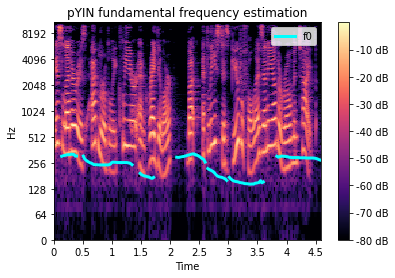

In [ ]:
# Write your implementation here
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
waveform_l, sr_l = librosa.load('LJ001-0048.wav', sr=16000)
f0_l, voiced_flag_l, voiced_probs_l = librosa.pyin(waveform_l, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'), sr=16000, hop_length=160)
times = librosa.times_like(f0_l)

D_l = librosa.amplitude_to_db(np.abs(librosa.stft(waveform_l)), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(D_l, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0_l, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

print("The F0 mean of 'LJ001-0048.wav': {}".format(np.nanmean(f0_l)))

The F0 mean of 'nlpass1.wav': 186.77179072492882


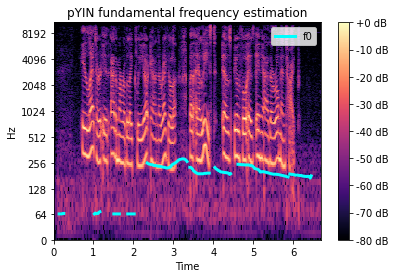

In [ ]:
# Write your implementation here
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
waveform_n, sr_n = librosa.load('nlpass1.wav', sr=16000)
f0_n, voiced_flag_n, voiced_probs_n = librosa.pyin(waveform_n, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'), sr=16000, hop_length=160)
times = librosa.times_like(f0_n)

D_n = librosa.amplitude_to_db(np.abs(librosa.stft(waveform_n)), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(D_n, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0_n, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

print("The F0 mean of 'nlpass1.wav': {}".format(np.nanmean(f0_n)))

## (6) [20 marks] Dynamic time warping

Now you have the reference speech (https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav) and your own recording. Their lengths are different. In some tasks, we need to align the speech to have same length. Please use Dynamic Time Warping to align your recording and reference speech sample. You need to align them by using 80-dimensional mel-spectrogram.

Here are your tasks:
* Visualize the alignment 80-dimensional mel-spectrogram of the reference speech and your own recording
* Visualize the wraped path/map from the DTW algorithm. [Here](https://raw.githubusercontent.com/cbellei/DTW/master/DTW.png) is how the wraped path may look like.

You can use [FastDTW](https://github.com/slaypni/fastdtw) tool to align them.




In [ ]:
# Write your implementation here
!pip install fastdtw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


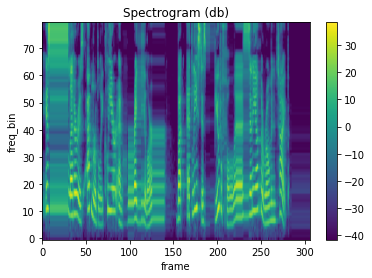

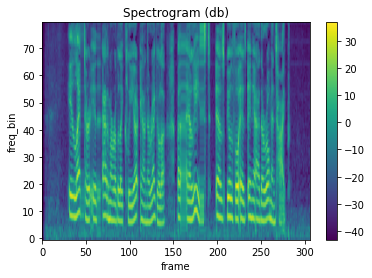

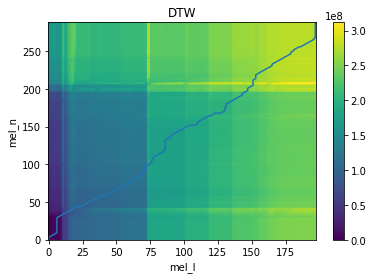

In [ ]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import torch

#waveform_l, sr_l = librosa.load('LJ001-0048.wav', sr=16000)
#waveform_n, sr_n = librosa.load('nlpass1.wav', sr=16000)
meltransform = T.MelSpectrogram(target_sample_rate, n_mels=80, n_fft=1024)
mel_specgram1_l = meltransform(resampled_waveform) 
#print(mel_specgram1_l[0].size())
d1 = mel_specgram1_l[0].size()[1]
mel_l = mel_specgram1_l[0].numpy().T
mel_specgram1_n = meltransform(resampled_waveform1) 
#print(mel_specgram1_n[0].size())
d2 = mel_specgram1_n[0].size()[1]
mel_n = mel_specgram1_n[0].numpy().T
distance, path = fastdtw(mel_l, mel_n, dist=euclidean)
n = len(path)
al_mel_l = np.zeros((n,80))
al_mel_n = np.zeros((n,80))
for i in range(n):
  al_mel_l[i,:] = mel_l[path[i][0],:]
  al_mel_n[i,:] = mel_n[path[i][1],:]
al_mel_l = al_mel_l.T
plot_spectrogram(torch.from_numpy(al_mel_l).to(torch.float32))
al_mel_n = al_mel_n.T
plot_spectrogram(torch.from_numpy(al_mel_n).to(torch.float32))
#compute distance matrix of mel_l and mel_n
DTW = np.zeros((d2,d1),dtype=float)
#first row
for i in range(1,d1):
  DTW[0,i] = np.linalg.norm(mel_l[i,:]-mel_n[0,:])**2 + DTW[0,i-1]
#first column
for i in range(1,d2):
  DTW[i,0] = np.linalg.norm(mel_l[0,:]-mel_n[i,:])**2 + DTW[i-1,0]
for i in range(1,d2):
  for j in range(1,d1):
    cost = np.linalg.norm(mel_l[j,:]-mel_n[i,:])**2
    DTW[i,j] = cost + np.min([DTW[i-1,j],DTW[i,j-1],DTW[i-1,j-1]])
plt.figure()
plt.imshow(DTW,origin='lower',interpolation='none',aspect='auto')
#plt.clim([DTW[0,0],10*DTW[d2-1,d1-1]])
x = [s[0] for s in path]
y = [s[1] for s in path]
plt.plot(x,y)  #plot path
plt.xlabel('mel_l')
plt.ylabel('mel_n')  
plt.title('DTW')
plt.colorbar()
plt.show()

## (7) [30 marks] Paper reading

Please read the paper provided below and summarize its key points in 200-300 words. Your summary should include
* a description of the problem being addressed
* the paper's main contributions
* the metrics used for evaluation, and the experimental results
* the findings from the paper

[*PitchNet: Unsupervised Singing Voice Conversion with Pitch Adversarial Network*](https://arxiv.org/abs/1912.01852)

**Note: longer than 300 words may have negative impact.**

```
# Write your summary here (200-300 words) 
```



*   1.While the previous unsupervised singing voice conversion approach(USVC) could generate singing voice perceptually similar to the target
singer, the quality of generated singing often suffers due to the difficulty of learning a joint representation of phonetic and pitch
representation.
*   2.To address the problem, the paper introduces adversarially trained pitch regression network and singer classification network based on
the orignal model to encourage the encoder network to learn not only singer-invariant but also pitch-invariant representation, at the
same time extract the pitch from source audio as an additional input to the decoder. The loss function is also changed to the
difference between the reconstruction loss and the adversarial loss (singer classification loss and pitch regression loss weighted sum), 
and the reconstruction loss and the adversarial loss need to be minimized alternately to obtain the final result.
Finally, the new method(PitchNet) can greatly improve the quality of the converted voice and achieve flexible pitch manipulation at the 
same time.
*   3.To compare the conversions between USVC and PitchNet, we employed an automatic evaluation score and a human evaluation score. The 
former method employees the pitch tracker of librosa package  to extract pitch information of the input and output audio. Then the 
normalized cross correlation(NCC) will compare the difference between them and gives a score between 0 and 1. The latter uses Mean 
Opinion Score (MOS). Subjects are asked to rate the naturalness and similarity of the audio from 0 to 5. The higher the score is, 
the better the output pitch matches the input pitch.
*   4.The experiments show that both assessment metrics PitchNet are superior to USVC. Therefore, a novel unsupervised singing voice conversion
method named PitchNet is proposed.

